# Loss Run info extraction

In [43]:
import lossrun
import matplotlib.pyplot as plt
import cv2

## Load data and clasify as loss report, npdb and emails

The file is a: LOSSRUN


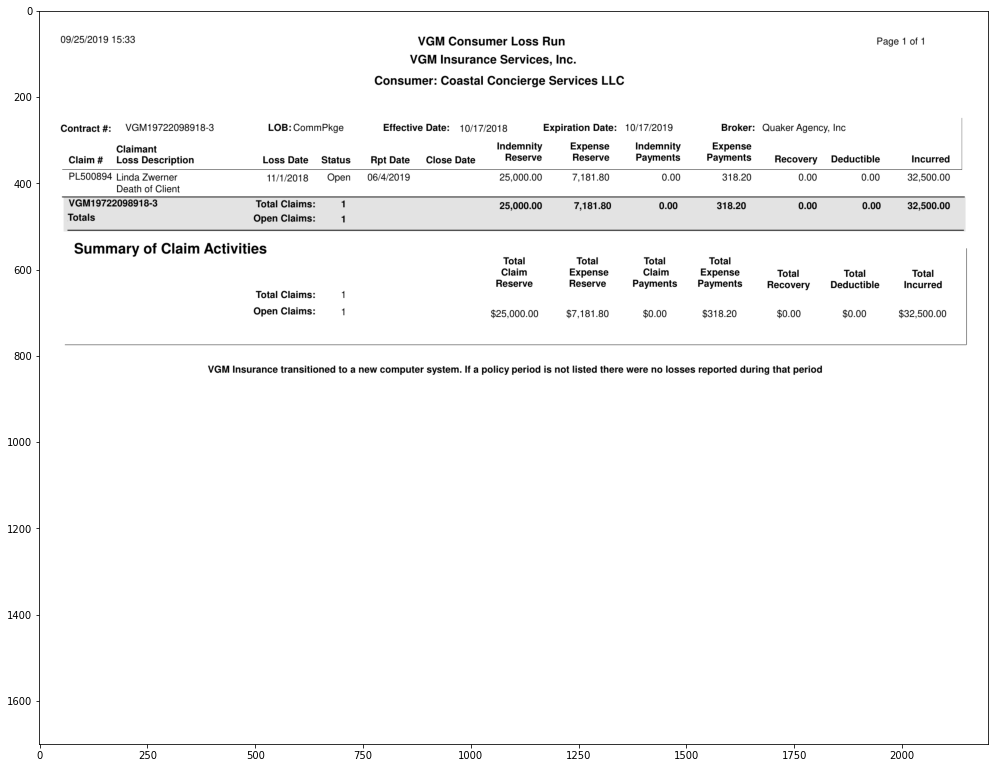

(<Figure size 1224x1080 with 1 Axes>,
 None)

In [10]:
## load file as image and text
_file = 'Coastal Concierge Services    -     VGM19722098918-3     -  lossrun VGM-YES'
_image_file = 'images/'+ _file + '.png'
_txt_file = 'text/'+ _file + '.txt'

# load image
_image = cv2.imread(_image_file)
# load text
txt_dict = lossrun.read_dict(_txt_file)

# check the result
print('The file is a:', lossrun.is_report(_image, txt_dict)[0])
plt.figure(figsize=(17,15)),plt.imshow(_image),plt.show()

## Process acording the report

In [40]:
# Check the report type and determinate the rules 
report_type, topic_conf, ent_conf = lossrun.is_report(_image,txt_dict)

suspects = lossrun.search_rules(txt_dict, topic_conf)
suspects

[('policy_num', 'CONTRACT', 38, 51, 265),
 ('insured', 'CONSUMER:', 22, 778, 152),
 ('status', 'STATUS', 67, 655, 338),
 ('report_date', 'LOSS DATE', 65, 520, 339),
 ('total_incured', 'INCURRED', 78, 2024, 337),
 ('total_incured', 'INCURRED', 147, 2006, 628)]

## Relate the information acording text distribution

In [48]:
import re

spatial_filter = lossrun.spatial_filter(txt_dict,j)
spatial_filter_topics = len(spatial_filter)

for topic in range(spatial_filter_topics):
    spatial_filter[topic] = list(dict.fromkeys(spatial_filter[topic]))
    string = ' '.join(spatial_filter[topic])
    string = re.sub('\s+',' ', string)
    print(suspects[topic][0] + ' ' + str(suspects[topic][3]) + ' ' +str(suspects[topic][4]) +' ' + string)
    print(string )
    print('.'*100 + '\n')


policy_num 51 265  Claim # PL500894 VGM19722098918-3 Totals Summary #: |. LOB: CommPkge Effective Date: 10/17/2018 Expiration 10/17/2019 Broker: Quaker Agency, Inc
 Claim # PL500894 VGM19722098918-3 Totals Summary #: |. LOB: CommPkge Effective Date: 10/17/2018 Expiration 10/17/2019 Broker: Quaker Agency, Inc
....................................................................................................

insured 778 152 Effective Date: Status Rpt Date Close Open 06/4/2019 1 to a new computer system. Coastal Concierge Services LLC
Effective Date: Status Rpt Date Close Open 06/4/2019 1 to a new computer system. Coastal Concierge Services LLC
....................................................................................................

status 655 338 Open 1 to Rpt Date Close Reserve Payments Recovery Deductible Incurred
Open 1 to Rpt Date Close Reserve Payments Recovery Deductible Incurred
.........................................................................................

## Relate the information acording named enity recognition


In [53]:
import spacy 
nlp = spacy.load('en_core_web_lg')

        

In [54]:
import string as String
printable = set(String.printable)

for i in range(len(spatial_filter)):

    string = ' '.join(spatial_filter[:][i])
    string = re.sub('\s+',' ',string)
    
    
    # remove non printalbes elemts
    string = ''.join(filter(lambda x: x in printable, string))
    #print (string)
    doc = nlp(string)

    for ent in doc.ents:
        print('It will be added to data base : ')
        print(ent.text + ' in ' + ent.label_)
        print('\n.................')

It will be added to data base : 
10/17/2019 in DATE

.................
It will be added to data base : 
Quaker Agency in ORG

.................
It will be added to data base : 
Coastal Concierge Services LLC in ORG

.................
It will be added to data base : 
1 in CARDINAL

.................
It will be added to data base : 
32,500.00 in CARDINAL

.................
It will be added to data base : 
$32,500.00 in MONEY

.................


## Relate the information acording contextual relation

In [61]:
# load contextual model
import string as String
printable = set(String.printable)

for i in range(len(spatial_filter)):

    string = ' '.join(spatial_filter[:][i])
    string = re.sub('\s+',' ',string)
    
    
    # remove non printalbes elemts
    string = ''.join(filter(lambda x: x in printable, string))
    #print (string)
    _suspect = nlp(string)
    _topic = nlp(suspects[i][0])
    print(_suspect.similarity(_topic) , i)

0.0 0
0.3391836157023431 1
0.46141776846706173 2
0.0 3
0.0 4


## Insert candidates to data base

In [58]:
suspects[1][0]

'insured'